In [1]:
pip install plotly cufflinks


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel("/Users/shehabsalah/Desktop/diabetes.xlsx", header=1)
data.columns = data.columns.str.strip()



In [5]:
from sklearn.impute import SimpleImputer

columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

imputer = SimpleImputer(strategy='mean')

data[columns_with_zeros] = imputer.fit_transform(data[columns_with_zeros])

print(data.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
data.drop_duplicates(inplace=True)


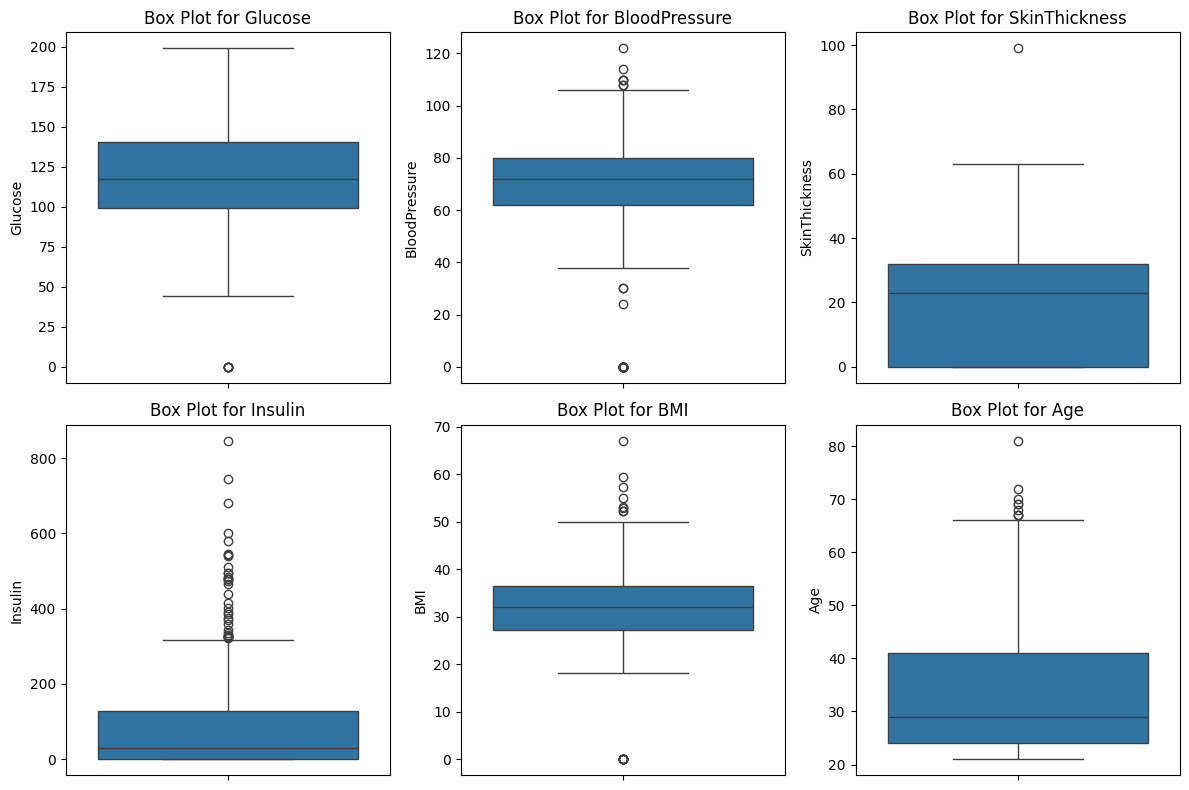

In [7]:
numerical_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[column])
    plt.title(f"Box Plot for {column}")

plt.tight_layout()
plt.show()


In [8]:

numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
print(data[numerical_columns].head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
4                  0.943638  0.200000  


In [9]:
data.columns = data.columns.str.strip()
print(data.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [10]:
columns_order = [col for col in data.columns if col != 'Outcome'] + ['Outcome']
data = data[columns_order]
print(data.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [11]:
for col in numerical_columns:
    if not pd.api.types.is_numeric_dtype(data[col]):
        print(f"العمود {col} يحتوي على قيم غير رقمية.")
    else:
        print(f"العمود {col} يحتوي فقط على قيم رقمية.")

categorical_columns = [] 
for col in categorical_columns:
    if not pd.api.types.is_categorical_dtype(data[col]):
        print(f"العمود {col} يحتوي على قيم غير فئوية.")
    else:
        print(f"العمود {col} يحتوي فقط على قيم فئوية.")


العمود Pregnancies يحتوي فقط على قيم رقمية.
العمود Glucose يحتوي فقط على قيم رقمية.
العمود BloodPressure يحتوي فقط على قيم رقمية.
العمود SkinThickness يحتوي فقط على قيم رقمية.
العمود Insulin يحتوي فقط على قيم رقمية.
العمود BMI يحتوي فقط على قيم رقمية.
العمود DiabetesPedigreeFunction يحتوي فقط على قيم رقمية.
العمود Age يحتوي فقط على قيم رقمية.


In [12]:
print(data.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      0.226180    0.607510       0.566438       0.207439    0.094326   
std       0.198210    0.160666       0.158654       0.161134    0.136222   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.058824    0.497487       0.508197       0.000000    0.000000   
50%       0.176471    0.587940       0.590164       0.232323    0.036052   
75%       0.352941    0.704774       0.655738       0.323232    0.150414   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean     0.476790                  0.168179    0.204015    0.348958  
std      0.117499                  0.141473    0.196004    0.476951  
min      0.000000                  

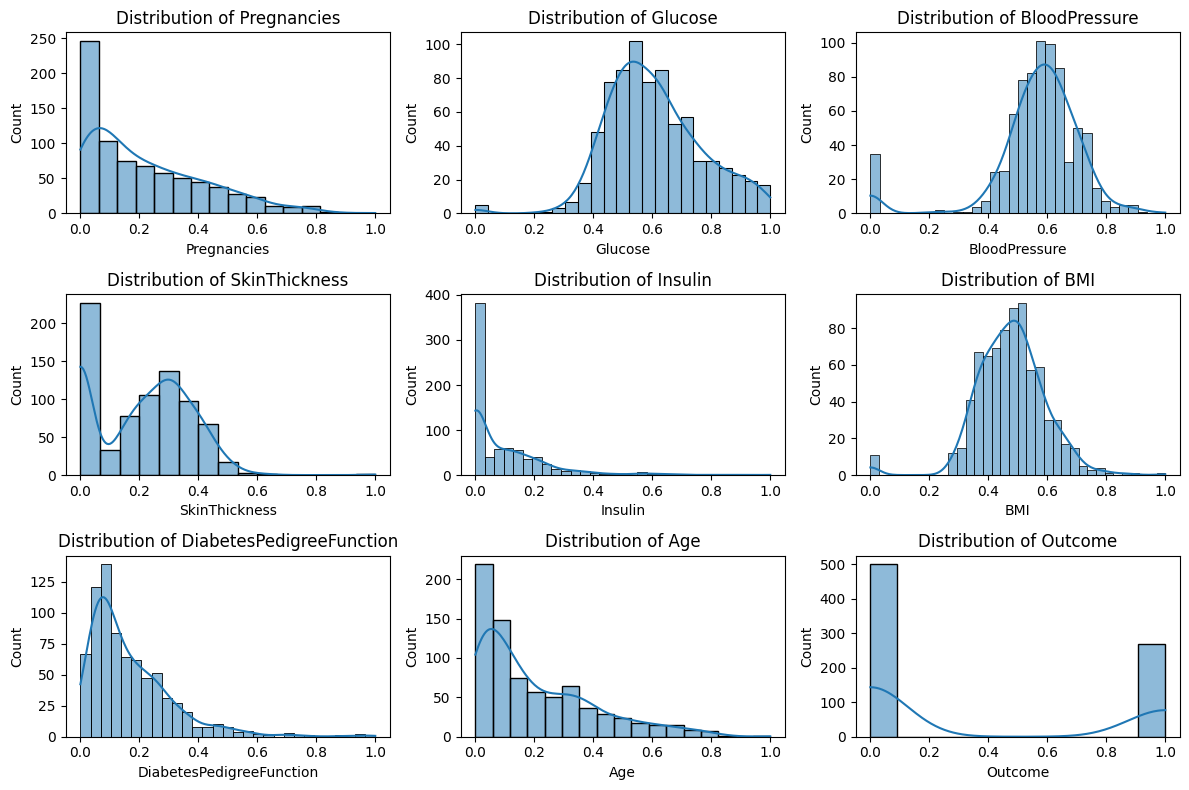

In [13]:
numerical_columns = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))
rows = (len(numerical_columns) + 2) // 3 
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(rows, 3, i)  
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


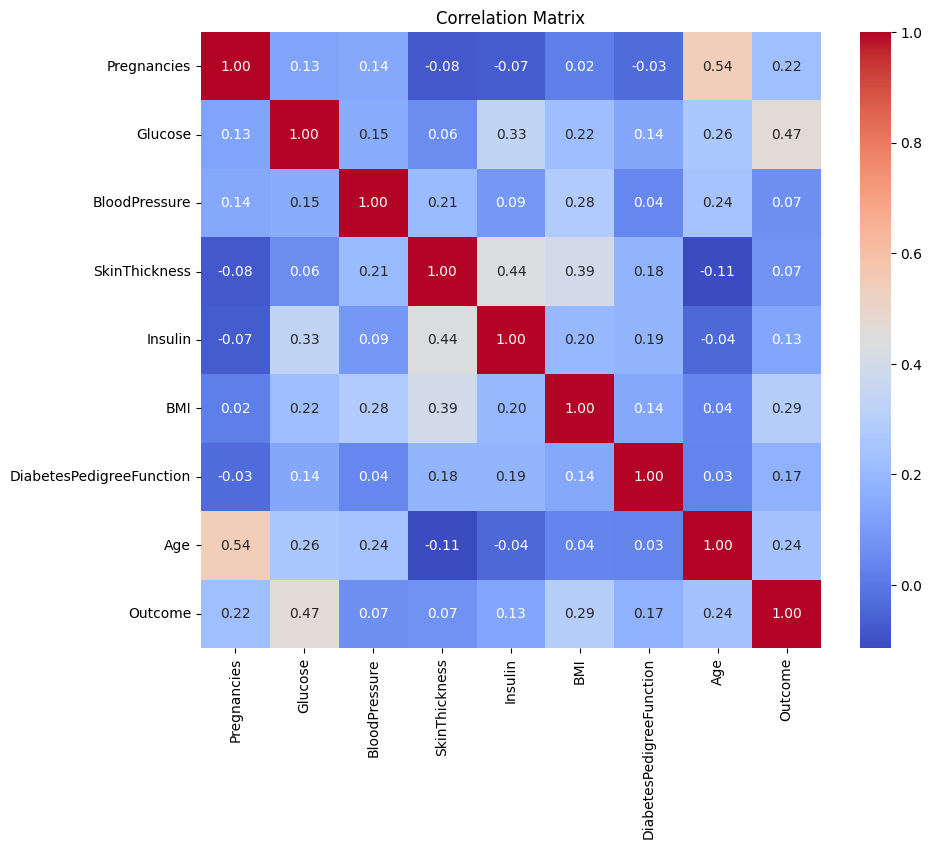

In [14]:
corr_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


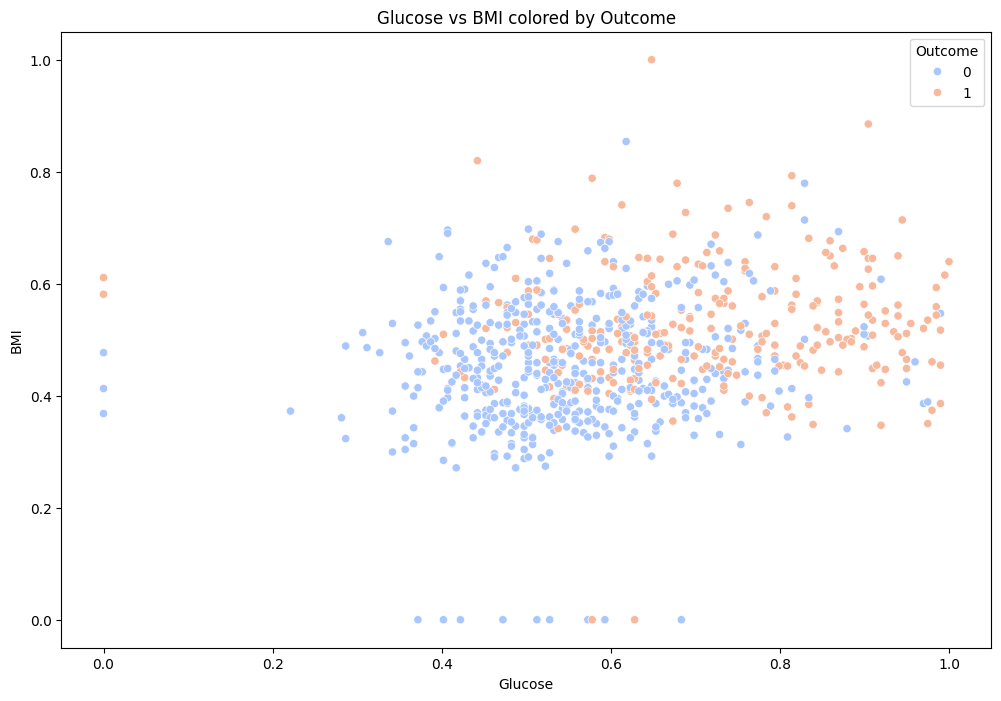

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x="Glucose", y="BMI", hue="Outcome", palette="coolwarm")
plt.title("Glucose vs BMI colored by Outcome")
plt.show()


In [16]:
from sklearn.model_selection import train_test_split

x = data.drop('Outcome', axis=1)  
y = data['Outcome']  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': model.coef_[0]
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


                    Feature  Importance
1                   Glucose    4.389821
5                       BMI    3.312216
7                       Age    1.715735
6  DiabetesPedigreeFunction    1.131301
0               Pregnancies    0.964179
3             SkinThickness    0.279829
4                   Insulin   -0.284622
2             BloodPressure   -0.563202


In [18]:
data['BMI_Age_Ratio'] = data['BMI'] / (data['Age'] + 1)  # إضافة 1 لتجنب القسمة على صفر


In [19]:

pca_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[pca_columns])

data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]


In [20]:

model = LogisticRegression()
model.fit(x_train, y_train)

feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': model.coef_[0]
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


                    Feature  Importance
1                   Glucose    4.389821
5                       BMI    3.312216
7                       Age    1.715735
6  DiabetesPedigreeFunction    1.131301
0               Pregnancies    0.964179
3             SkinThickness    0.279829
4                   Insulin   -0.284622
2             BloodPressure   -0.563202


In [21]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier()
}

results = {}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    results[model_name] = accuracy

print("Model Accuracy Comparison:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")


Model Accuracy Comparison:
LogisticRegression: 0.7662
SVC: 0.7468
RandomForest: 0.7143


In [22]:

best_model = LogisticRegression()
best_model.fit(x_train, y_train)
predictions = best_model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Model Evaluation:
Accuracy: 0.7662
Recall: 0.5818
F1 Score: 0.6400


In [23]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

best_model.fit(x_train_pca, y_train)
predictions_pca = best_model.predict(x_test_pca)
accuracy_pca = accuracy_score(y_test, predictions_pca)
print(f"Accuracy with PCA: {accuracy_pca:.4f}")


Accuracy with PCA: 0.7143


In [24]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


In [25]:
best_model.fit(x_train_pca, y_train)

predictions_pca = best_model.predict(x_test_pca)

accuracy_pca = accuracy_score(y_test, predictions_pca)
print(f"Accuracy with PCA: {accuracy_pca:.4f}")


Accuracy with PCA: 0.7143


In [27]:
model = LogisticRegression()
model.fit(x_train, y_train)

predictions_original = model.predict(x_test)

accuracy_original = accuracy_score(y_test, predictions_original)
print(f"Accuracy with Original Data: {accuracy_original:.4f}")


Accuracy with Original Data: 0.7662


In [28]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model.fit(x_train_scaled, y_train)

predictions_scaled = model.predict(x_test_scaled)

accuracy_scaled = accuracy_score(y_test, predictions_scaled)
print(f"Accuracy with Scaled Data: {accuracy_scaled:.4f}")


Accuracy with Scaled Data: 0.7532


In [29]:

pca = PCA(n_components=2)  # اختيار عدد المكونات التي نريد تقليل الأبعاد إليها
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

model.fit(x_train_pca, y_train)

predictions_pca = model.predict(x_test_pca)

accuracy_pca = accuracy_score(y_test, predictions_pca)
print(f"Accuracy with PCA: {accuracy_pca:.4f}")


Accuracy with PCA: 0.7143


In [30]:
x_train_scaled_pca = pca.fit_transform(x_train_scaled)
x_test_scaled_pca = pca.transform(x_test_scaled)

model.fit(x_train_scaled_pca, y_train)

predictions_scaled_pca = model.predict(x_test_scaled_pca)

accuracy_scaled_pca = accuracy_score(y_test, predictions_scaled_pca)
print(f"Accuracy with Scaled Data and PCA: {accuracy_scaled_pca:.4f}")


Accuracy with Scaled Data and PCA: 0.6623


In [31]:
print(f"Accuracy with Original Data: {accuracy_original:.4f}")
print(f"Accuracy with Scaled Data: {accuracy_scaled:.4f}")
print(f"Accuracy with PCA: {accuracy_pca:.4f}")
print(f"Accuracy with Scaled Data and PCA: {accuracy_scaled_pca:.4f}")


Accuracy with Original Data: 0.7662
Accuracy with Scaled Data: 0.7532
Accuracy with PCA: 0.7143
Accuracy with Scaled Data and PCA: 0.6623


In [32]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
rf_predictions = rf.predict(x_test)
rf_accuracy_grid = accuracy_score(y_test, rf_predictions)
print(f"Accuracy with Optimized Random Forest: {rf_accuracy_grid:.4f}")


Accuracy with Optimized Random Forest: 0.7532


In [33]:

svc_model = SVC()
svc_model.fit(x_train, y_train)

svc_predictions = svc_model.predict(x_test)

svc_accuracy = accuracy_score(y_test, svc_predictions)
print(f"SVC Accuracy: {svc_accuracy:.4f}")


SVC Accuracy: 0.7468


In [34]:

param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # خوارزميات الحل
    'max_iter': [100, 200, 300]  # عدد التكرارات
}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_lr.fit(x_train, y_train)

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

best_lr_model = grid_search_lr.best_estimator_
lr_predictions = best_lr_model.predict(x_test)
lr_accuracy_grid = accuracy_score(y_test, lr_predictions)
print(f"Accuracy with Optimized Logistic Regression: {lr_accuracy_grid:.4f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'saga'}
Accuracy with Optimized Logistic Regression: 0.7597


In [35]:
param_grid_svc = {
    'C': [0.1, 1, 10, 100],  # معلمة regularization
    'kernel': ['linear', 'rbf', 'poly'],  # نوع الدالة
    'gamma': ['scale', 'auto']  # معلمة gamma
}

grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5, n_jobs=-1, verbose=1)
grid_search_svc.fit(x_train, y_train)

print("Best parameters for SVC:", grid_search_svc.best_params_)

best_svc_model = grid_search_svc.best_estimator_
svc_predictions_grid = best_svc_model.predict(x_test)
svc_accuracy_grid = accuracy_score(y_test, svc_predictions_grid)
print(f"Accuracy with Optimized SVC: {svc_accuracy_grid:.4f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy with Optimized SVC: 0.7532


In [36]:
print(f"Accuracy with Optimized Logistic Regression: {lr_accuracy_grid:.4f}")
print(f"Accuracy with Optimized Random Forest: {rf_accuracy_grid:.4f}")
print(f"Accuracy with Optimized SVC: {svc_accuracy_grid:.4f}")


Accuracy with Optimized Logistic Regression: 0.7597
Accuracy with Optimized Random Forest: 0.7532
Accuracy with Optimized SVC: 0.7532


In [37]:

model = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

lr_accuracy_grid = grid_search.best_score_
print(f"Best parameters for Logistic Regression: {grid_search.best_params_}")
print(f"Accuracy with Optimized Logistic Regression: {lr_accuracy_grid:.4f}")


Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'saga'}
Accuracy with Optimized Logistic Regression: 0.7639


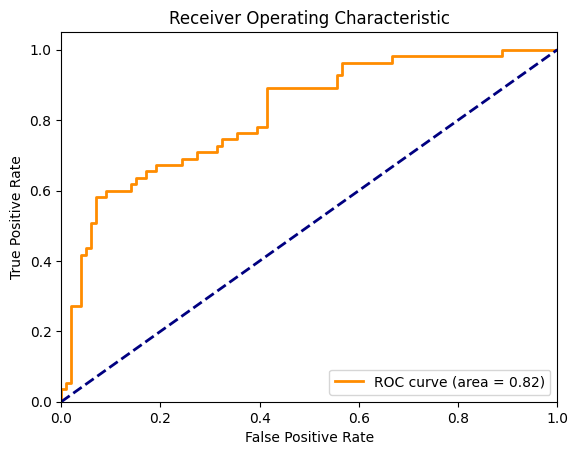

In [38]:
from sklearn.metrics import roc_curve, auc

# حساب ROC Curve باستخدام النموذج المحسن
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

# رسم ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


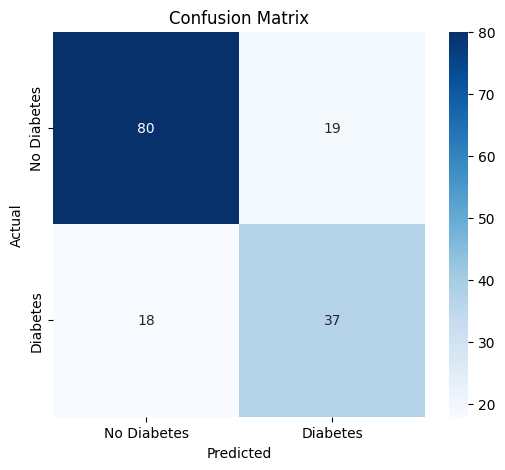

In [39]:

cm = confusion_matrix(y_test, best_model.predict(x_test))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [40]:

accuracy = accuracy_score(y_test, best_model.predict(x_test))

precision = precision_score(y_test, best_model.predict(x_test))
recall = recall_score(y_test, best_model.predict(x_test))
f1 = f1_score(y_test, best_model.predict(x_test))

# عرض النتائج
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7597
Precision: 0.6607
Recall: 0.6727
F1 Score: 0.6667


In [41]:
print(f"Accuracy with Optimized Logistic Regression: {lr_accuracy_grid:.4f}")
print(f"Accuracy with Optimized Random Forest: {rf_accuracy_grid:.4f}")
print(f"Accuracy with Optimized SVC: {svc_accuracy_grid:.4f}")


Accuracy with Optimized Logistic Regression: 0.7639
Accuracy with Optimized Random Forest: 0.7532
Accuracy with Optimized SVC: 0.7532


In [42]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_with_zeros:
    data[col] = data[col].replace(0, data[col].mean())


In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[normalized_columns] = scaler.fit_transform(data[normalized_columns])


In [44]:
print(data['Outcome'].value_counts())


Outcome
0    500
1    268
Name: count, dtype: int64


In [45]:
#explore data


In [46]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Age_Ratio,PCA1,PCA2
0,0.352941,0.670968,0.489796,0.304348,0.079086,0.314928,0.234415,0.483333,1,0.337581,0.304955,0.090382
1,0.058824,0.264516,0.428571,0.239130,0.079086,0.171779,0.116567,0.166667,0,0.339791,-0.193298,-0.072952
2,0.470588,0.896774,0.408163,0.147135,0.079086,0.104294,0.253629,0.183333,1,0.293445,0.218108,-0.127575
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0,0.418778,-0.298826,-0.057153
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1,0.535271,-0.169495,0.382749


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
 9   BMI_Age_Ratio             768 non-null    float64
 10  PCA1                      768 non-null    float64
 11  PCA2                      768 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 78.0 KB


In [48]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Age_Ratio,PCA1,PCA2
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02,7.680000e+02
mean,0.226180,0.501172,0.492396,0.213114,0.125793,0.291428,0.168179,0.204015,0.348958,0.404283,7.574959e-17,-1.850372e-17
std,0.198210,0.196361,0.123632,0.104687,0.111875,0.140601,0.141473,0.196004,0.476951,0.113961,2.541211e-01,2.094347e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.294259e-01,-6.038625e-01
25%,0.058824,0.359677,0.408163,0.147135,0.079086,0.190184,0.070773,0.050000,0.000000,0.338614,-2.112202e-01,-1.430258e-01
50%,0.176471,0.470968,0.489796,0.173913,0.079086,0.282209,0.125747,0.133333,0.000000,0.394778,-6.358515e-02,-1.209879e-02
75%,0.352941,0.620968,0.571429,0.271739,0.136118,0.376278,0.234095,0.333333,1.000000,0.472499,1.921084e-01,1.291985e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.923077,7.505469e-01,8.366637e-01


In [49]:
data.duplicated().sum()

np.int64(0)

In [50]:
#analysis

In [51]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Age_Ratio,PCA1,PCA2
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898,-0.285277,8.359709e-01,-1.789126e-01
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908,0.082294,3.758823e-01,4.641229e-01
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986,0.046715,4.096301e-01,2.194104e-01
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026,0.434729,5.142318e-02,6.711873e-01
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185,0.154523,7.466630e-02,6.051460e-01
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254,0.753692,9.250109e-02,5.156649e-01
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844,0.110040,3.439876e-02,3.959958e-01
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356,-0.447073,8.790187e-01,-5.800224e-02
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000,0.124033,3.238183e-01,2.526017e-01
BMI_Age_Ratio,-0.285277,0.082294,0.046715,0.434729,0.154523,0.753692,0.110040,-0.447073,0.124033,1.000000,-3.408869e-01,5.438941e-01


<Axes: >

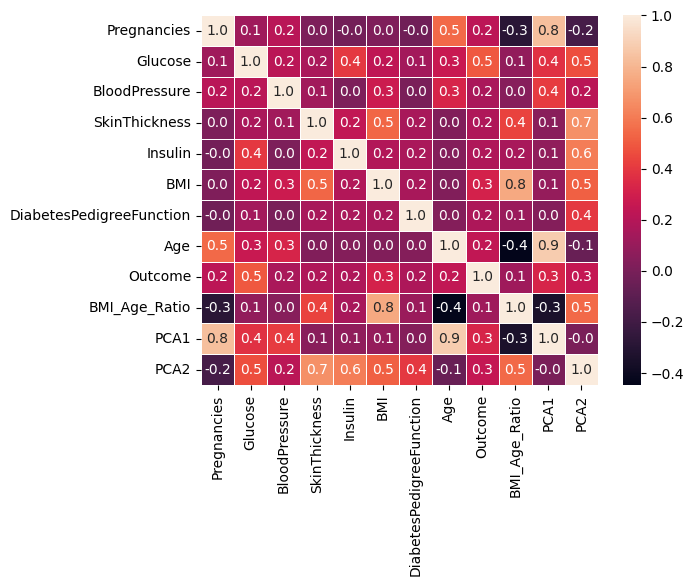

In [52]:
sns.heatmap(data.corr(), annot=True, fmt='0.1f',linewidth=.5)


<Axes: xlabel='Outcome', ylabel='count'>

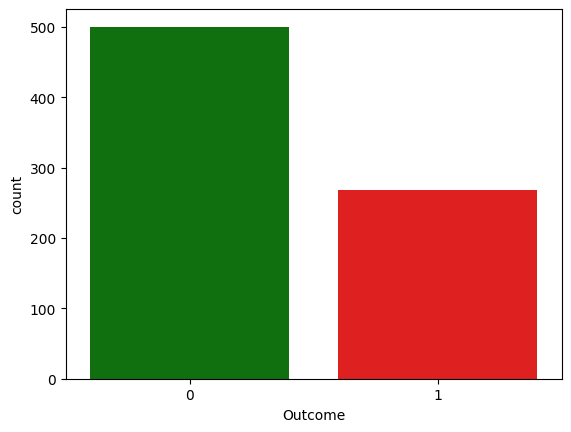

In [53]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])

<function matplotlib.pyplot.show(close=None, block=None)>

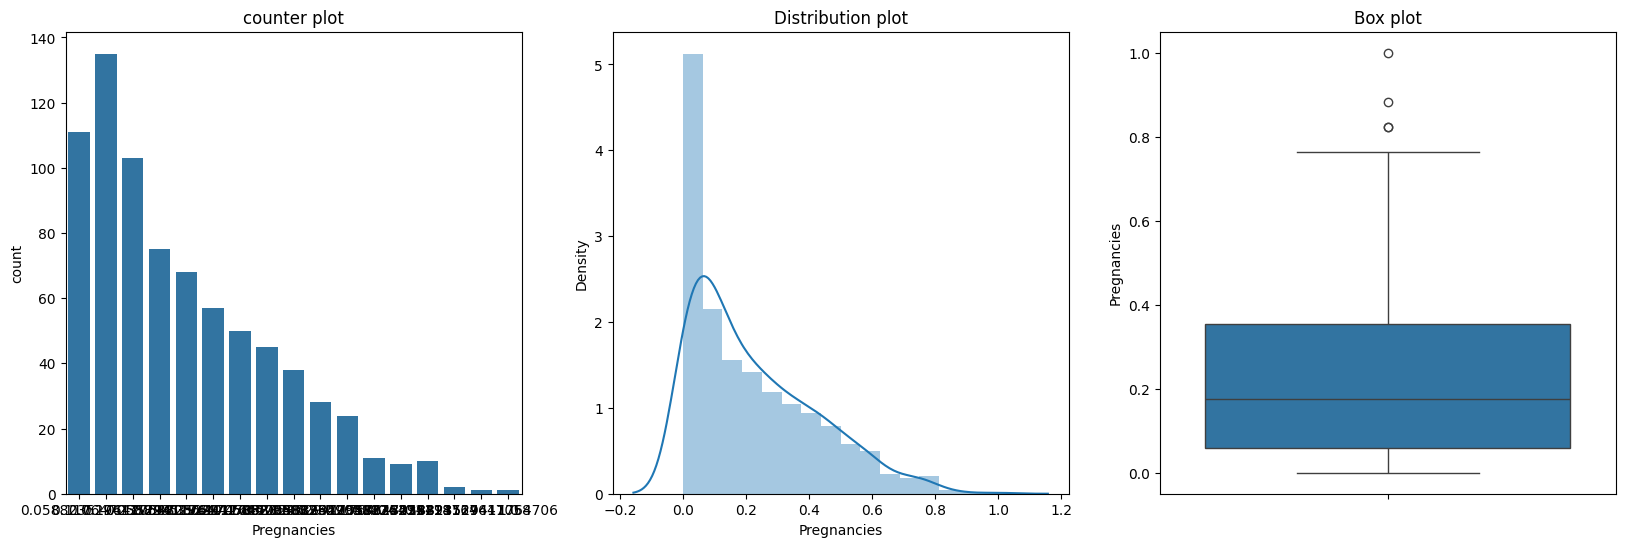

In [54]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("counter plot")
sns.countplot(x='Pregnancies',data=data)

plt.subplot(1,3,2)
plt.title("Distribution plot")
sns.distplot(data["Pregnancies"])

plt.subplot(1,3,3)
plt.title("Box plot")
sns.boxplot(data["Pregnancies"])

plt.show



<Axes: ylabel='Age'>

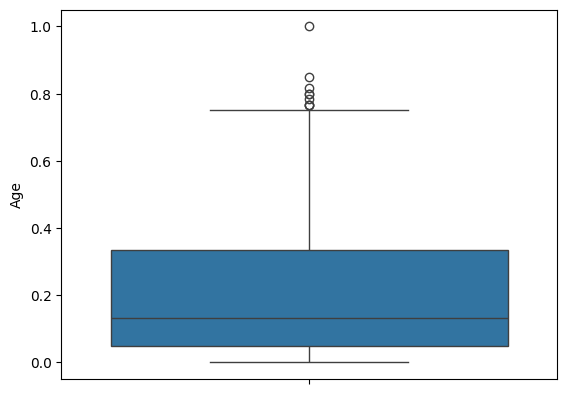

In [55]:
sns.boxplot(data.Age)

In [56]:
#create model

In [57]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [59]:
model1=LogisticRegression()


In [60]:
model1.fit(x_train,y_train)

LogisticRegression()

In [61]:
colums=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

LogisticRegression()
accuracy is: 0.7662337662337663 recall is: 0.7407407407407407 f1 is: 0.5263157894736842


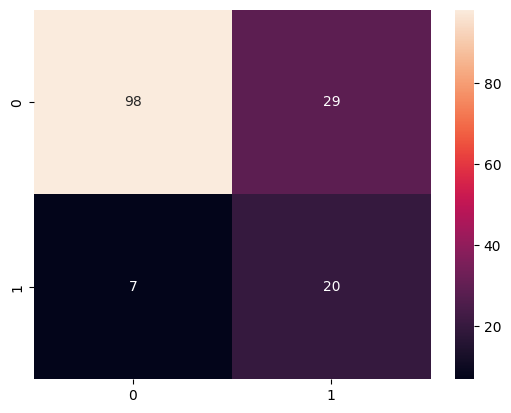

In [62]:
def cal(model):
    pre=model1.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('accuracy is:',accuracy,'recall is:',recall,'f1 is:',f1)
cal(model1)

In [63]:
model2=SVC()

In [64]:
model2.fit(x_train,y_train)

SVC()

SVC()
accuracy is: 0.7662337662337663 recall is: 0.7096774193548387 f1 is: 0.55


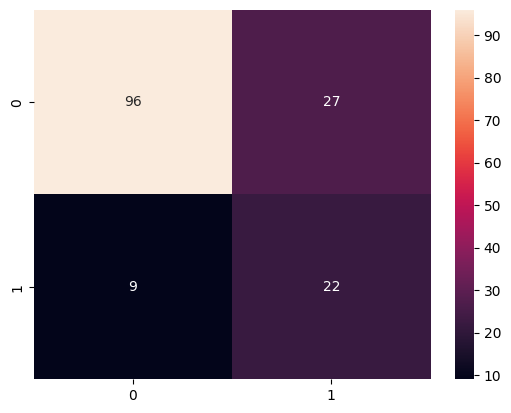

In [65]:
def cal(model):
    pre=model2.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('accuracy is:',accuracy,'recall is:',recall,'f1 is:',f1)
cal(model2)

In [66]:
model3=RandomForestClassifier()

In [67]:
model3.fit(x_train,y_train)

RandomForestClassifier()

RandomForestClassifier()
accuracy is: 0.7662337662337663 recall is: 0.6756756756756757 f1 is: 0.5813953488372093


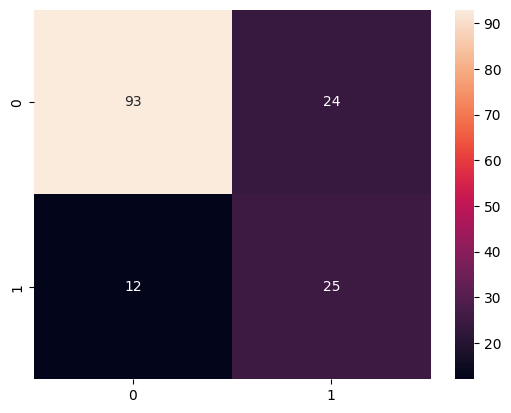

In [68]:
def cal(model):
    pre=model3.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('accuracy is:',accuracy,'recall is:',recall,'f1 is:',f1)
cal(model3)

In [69]:
model4=GradientBoostingClassifier(n_estimators=1000)

In [70]:
model4.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=1000)

GradientBoostingClassifier(n_estimators=1000)
accuracy is: 0.7142857142857143 recall is: 0.5609756097560976 f1 is: 0.5111111111111111


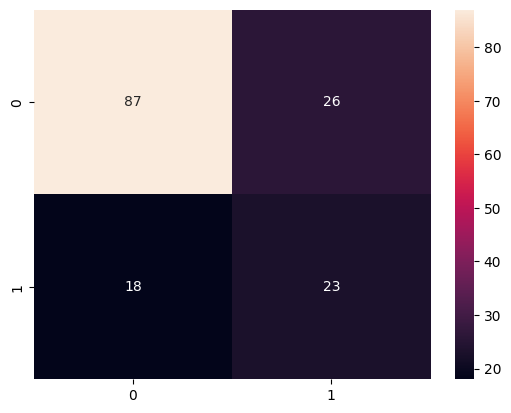

In [71]:
def cal(model):
    pre=model4.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)
    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)

    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('accuracy is:',accuracy,'recall is:',recall,'f1 is:',f1)
cal(model4)

In [72]:
result1

[0.7662337662337663,
 0.7662337662337663,
 0.7662337662337663,
 0.7142857142857143]

In [73]:
result2

[np.float64(0.7407407407407407),
 np.float64(0.7096774193548387),
 np.float64(0.6756756756756757),
 np.float64(0.5609756097560976)]

In [74]:
result3

[np.float64(0.5263157894736842),
 np.float64(0.55),
 np.float64(0.5813953488372093),
 np.float64(0.5111111111111111)]

In [75]:
pd.DataFrame({'Algorithms':colums,'Accuracies':result1,'recall':result2,'F1score':result3})

,Algorithms,Accuracies,recall,F1score
0,LogisticRegression,0.766234,0.740741,0.526316
1,SVC,0.766234,0.709677,0.550000
2,RandomForestClassifier,0.766234,0.675676,0.581395
3,GradientBoostingClassifier,0.714286,0.560976,0.511111


In [76]:
FinalResult=pd.DataFrame({'Algorithm':colums,'Accuracies':result1,'recall':result2,'F1score':result3})

In [77]:
print(FinalResult)


                    Algorithm  Accuracies    recall   F1score
0          LogisticRegression    0.766234  0.740741  0.526316
1                         SVC    0.766234  0.709677  0.550000
2      RandomForestClassifier    0.766234  0.675676  0.581395
3  GradientBoostingClassifier    0.714286  0.560976  0.511111


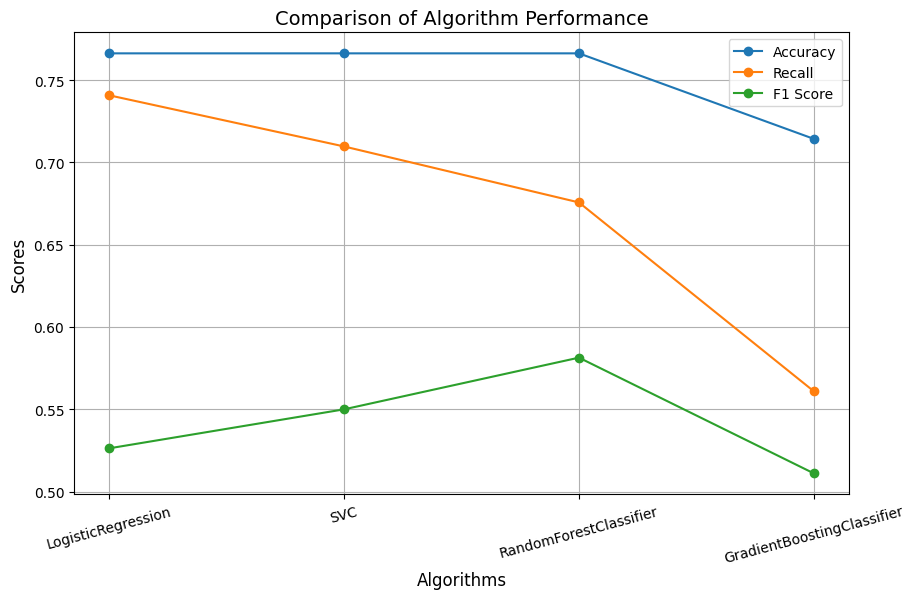

In [78]:
plt.figure(figsize=(10, 6))

# رسم الخطوط
plt.plot(FinalResult['Algorithm'], FinalResult['Accuracies'], marker='o', label='Accuracy')
plt.plot(FinalResult['Algorithm'], FinalResult['recall'], marker='o', label='Recall')
plt.plot(FinalResult['Algorithm'], FinalResult['F1score'], marker='o', label='F1 Score')

# تحسين مظهر الرسم
plt.title('Comparison of Algorithm Performance', fontsize=14)
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=15)  # لتدوير أسماء الخوارزميات إذا لزم الأمر
plt.show()


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model = LogisticRegression()


model.fit(x_train, y_train)


def get_user_input():
    pregnancies = float(input("Enter number of Pregnancies: "))
    glucose = float(input("Enter Glucose level: "))
    blood_pressure = float(input("Enter Blood Pressure: "))
    skin_thickness = float(input("Enter Skin Thickness: "))
    insulin = float(input("Enter Insulin level: "))
    bmi = float(input("Enter BMI: "))
    diabetes_pedigree = float(input("Enter Diabetes Pedigree Function: "))
    age = int(input("Enter Age: "))
    
    return pd.DataFrame({
        'Pregnancies': [pregnancies],
        'Glucose': [glucose],
        'BloodPressure': [blood_pressure],
        'SkinThickness': [skin_thickness],
        'Insulin': [insulin],
        'BMI': [bmi],
        'DiabetesPedigreeFunction': [diabetes_pedigree],
        'Age': [age]
    })


new_data = get_user_input()

# استخدام النموذج المدرب للتنبؤ
prediction = model.predict(new_data)

# عرض النتيجة
if prediction[0] == 1:
    print("النموذج يتوقع أن الشخص يعاني من مرض السكري.")
else:
    print("النموذج يتوقع أن الشخص لا يعاني من مرض السكري.")